In [95]:


def fwd_euler(f,y0,t0,h,N):
    y = [y0]
    t = [t0]
    for i in range(N):
        y.append(y[-1] + h*f(t[-1],y[-1]))
        t.append(t[-1] + h)
    return t,y

def bwd_euler(f,y0,t0,h,N,M):
    y = [y0]
    t = [t0]
    for i in range(N):
        ynext = [y[-1]]
        for _ in range(M):
            ynext.append(y[-1] + h*f(t[-1]+h,ynext[-1]))
        y.append(y[-1] + h*f(t[-1] + h,ynext[-1]))
        t.append(t[-1] + h)
    return t,y

def implicit_trapezoid(f,y0,t0,h,N,M):
    y = [y0]
    t = [t0]
    for i in range(N):
        ynext = [y[-1]]
        for _ in range(M):
            ynext.append(y[-1] + h*f(t[-1]+h,ynext[-1]))
        y.append(y[-1] + (h/2)*(f(t[-1],y[-1])+f(t[-1]+h,ynext[-1])))
        t.append(t[-1] + h)
    return t,y

def trapezoid_euler(f,y0,t0,h,N,M):
    y = [y0]
    t = [t0]
    for i in range(N):
        y.append(y[-1] + (h/2)*(f(t[-1],y[-1])+f(t[-1]+h,y[-1] + h*f(t[-1],y[-1]))))
        t.append(t[-1] + h)
    return t,y

def implicit_midpoint(f,y0,t0,h,N,M):
    y = [y0]
    t = [t0]
    for i in range(N):
        ynext = [y[-1]]
        for _ in range(M):
            ynext.append(y[-1] + h*f(t[-1]+h,ynext[-1]))
        y.append(y[-1] + h*f(t[-1]+h/2,(y[-1] + ynext[-1])/2))
        t.append(t[-1] + h)
    return t,y

# def implicit_midpoint_alt(f,y0,t0,h,N,M):
#     y = [y0]
#     t = [t0]
#     k = 0
#     for i in range(M):ssssssssssss 
#         k = f(t[-1]+h/2,y[-1]+(h/2)*k)

#     for i in range(N):
#         k = f(t[-1]+h/2,y[-1]+(h/2)*k)
#         y.append(y[-1] + h*f(t[-1]+h/2,ynext[-1]))
#         t.append(t[-1] + h)
#     return t,y

def rk4(f,y0,t0,h,N):
    y = [y0]
    t = [t0]
    for i in range(N):
        k1 = f(t[-1],y[-1])
        k2 = f(t[-1]+h/2,y[-1]+h/2*k1)
        k3 = f(t[-1]+h/2,y[-1]+h/2*k2)
        k4 = f(t[-1]+h,y[-1]+h*k3)
        y.append(y[-1] + (h/6)*(k1 + 2*(k2 + k3) + k4))
        t.append(t[-1] + h)
    return t,y




In [96]:
def adams_bashforth(f,y0,t0,h,N):
    t,y = fwd_euler(f,y0,t0,h,1)
    for i in range(N):
        y.append(y[-1] + (3*h/2)*(f(t[-1],y[-1]) - (h/2)*f(t[-2],y[-2])))
        t.append(t[-1] + h)
    return t,y

In [115]:
import sympy as sp
import numpy as np


gamma = sp.symbols('gamma')
# Define the matrix A and vector b
A = sp.Matrix([[gamma, 0],
                [1-gamma, gamma]])

b = sp.Matrix([1-gamma, gamma])

# Define the number of elements in b
s = len(b)

z = sp.symbols('z')

R = sp.ones(1,1) + z*b.T * (sp.eye(s) - A).inv() * sp.ones(s, 1)
# b.shape
R = sp.simplify(R[0])

R = R.subs(gamma,1+1/sp.sqrt(2))
R

sqrt(2)*(-z*(sqrt(2)/2 + 1) - z + sqrt(2)/2)

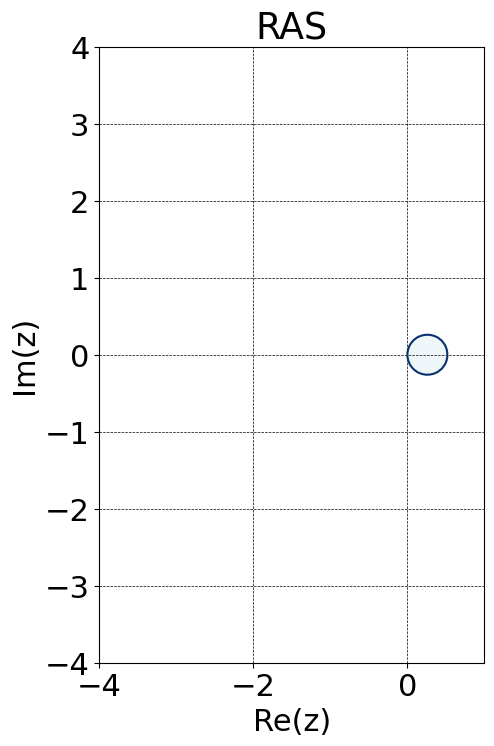

In [116]:
import matplotlib.pyplot as plt
def R2RAS(R = lambda z : 1 + z + 0.5*z*z,cmap='Blues',label='R'):
    nx = 100
    ny = 160
    x = np.linspace(-4,1,nx)
    y = np.linspace(-4,4,ny)
    xg,yg = np.meshgrid(x,y)

    z = xg + 1j*yg 
    f = R(z)
    absf = (f.real)**2 + (f.imag)**2

    plt.rcParams.update({'font.size': 22})
    
    con = plt.contourf(xg,yg,absf,np.arange(2), cmap=cmap, alpha=0.1)
    plt.contour(xg,yg,absf,np.arange(2), cmap=cmap)  
    plt.plot([], [], color=cmap[:-1], label=label)
    plt.title("RAS")
    plt.xlabel("Re(z)")
    plt.ylabel("Im(z)")
    # plt.colorbar(con, label=label, orientation='vertical')
    ax.set_aspect(1)
    plt.grid(color='k', linestyle='--', linewidth=0.5)
    # plt.show()

fig, ax = plt.subplots(figsize=(8,8))
R = sp.lambdify((z,),R)
R2RAS(R,cmap='Blues',label='R')
# R

In [43]:
import sympy as sp
import numpy as np

gamma = sp.symbols('gamma')
# Define the matrix A and vector b
A = sp.Matrix([[gamma, 0],
                [1-gamma, gamma]])

b = sp.Matrix([1-gamma, gamma])

# Define the number of elements in b
s = len(b)

# Compute the sum of b
ord1 = sum(b[l] for l in range(s))

# Compute the second sum
ord2 = 2*sum(b[l]*sum(A[l, q] for q in range(A.shape[1]) )for l in range(s) )

ord3 = 3*sum(b[j]*A[j,k]*A[j,l] for j in range(s) for k in range(s) for l in range(s))
ord3alt = 6*sum(b[j]*A[j,k]*A[k,l] for j in range(s) for k in range(s) for l in range(s))

# Display the results
print("Sum of b:", ord1)
print("Second sum:", ord2)
print("Third sum:", ord3)
print("Third sum:", ord3alt)

solutions_ord1 = sp.solve(ord1 - 1, gamma)
solutions_ord2 = sp.solve(ord2 - 1, gamma)
solutions_ord3 = sp.solve(ord3 - 1, gamma)
solutions_ord3alt = sp.solve(ord3alt - 1, gamma)

# Display the results
print("Solutions for ord1 = 1:", solutions_ord1)
print("Solutions for ord2 = 1:", solutions_ord2)
print("Solutions for ord3 = 1:", solutions_ord3)
print("Solutions for ord3alt = 1:", solutions_ord3alt)


Sum of b: 1
Second sum: 2*gamma*(1 - gamma) + 2*gamma
Third sum: 3*gamma**3 + 9*gamma**2*(1 - gamma) + 3*gamma*(1 - gamma)**2
Third sum: 6*gamma**3 + 18*gamma**2*(1 - gamma)
Solutions for ord1 = 1: []
Solutions for ord2 = 1: [1 - sqrt(2)/2, sqrt(2)/2 + 1]
Solutions for ord3 = 1: [1/3 + (-1/2 - sqrt(3)*I/2)*(1/27 + sqrt(7)*I/9)**(1/3) + 4/(9*(-1/2 - sqrt(3)*I/2)*(1/27 + sqrt(7)*I/9)**(1/3)), 1/3 + 4/(9*(-1/2 + sqrt(3)*I/2)*(1/27 + sqrt(7)*I/9)**(1/3)) + (-1/2 + sqrt(3)*I/2)*(1/27 + sqrt(7)*I/9)**(1/3), 1/3 + 4/(9*(1/27 + sqrt(7)*I/9)**(1/3)) + (1/27 + sqrt(7)*I/9)**(1/3)]
Solutions for ord3alt = 1: [1/2 + (-1/2 - sqrt(3)*I/2)*(1/12 + sqrt(5)*I/24)**(1/3) + 1/(4*(-1/2 - sqrt(3)*I/2)*(1/12 + sqrt(5)*I/24)**(1/3)), 1/2 + 1/(4*(-1/2 + sqrt(3)*I/2)*(1/12 + sqrt(5)*I/24)**(1/3)) + (-1/2 + sqrt(3)*I/2)*(1/12 + sqrt(5)*I/24)**(1/3), 1/2 + 1/(4*(1/12 + sqrt(5)*I/24)**(1/3)) + (1/12 + sqrt(5)*I/24)**(1/3)]


In [48]:
import sympy as sp

gamma = sp.symbols('gamma')
# Define the matrix A and vector b
A = sp.Matrix([[gamma, 0],
                [1-(2*gamma), gamma]])

b = sp.Matrix([1/2,1/2])

# Define the number of elements in b
s = len(b)

# Compute the sum of b
ord1 = sum(b[l] for l in range(s))

# Compute the second sum
ord2 = 2*sum(b[l]*sum(A[l, q] for q in range(A.shape[1]) )for l in range(s) )

ord3 = 3*sum(b[j]*A[j,k]*A[j,l] for j in range(s) for k in range(s) for l in range(s))
ord3alt = 6*sum(b[j]*A[j,k]*A[k,l] for j in range(s) for k in range(s) for l in range(s))


# Display the results
print("Sum of b:", ord1)
print("Second sum:", ord2)
print("Third sum:", ord3)
print("Third sum:", ord3alt)

solutions_ord1 = sp.solve(ord1 - 1, gamma)
solutions_ord2 = sp.solve(ord2 - 1, gamma)
solutions_ord3 = sp.solve(ord3 - 1, gamma)
solutions_ord3alt = sp.solve(ord3alt - 1, gamma)

# Display the results
print("Solutions for ord1 = 1:", solutions_ord1)
print("Solutions for ord2 = 1:", solutions_ord2)
print("Solutions for ord3 = 1:", solutions_ord3)
print("Solutions for ord3alt = 1:", solutions_ord3alt)

Sum of b: 1.00000000000000
Second sum: 1.00000000000000
Third sum: 3.0*gamma**2 + 3*gamma*(0.5 - 1.0*gamma) + 1.5*gamma*(1 - 2*gamma) + 3*(0.5 - 1.0*gamma)*(1 - 2*gamma)
Third sum: 6.0*gamma**2 + 6*gamma*(0.5 - 1.0*gamma) + 3.0*gamma*(1 - 2*gamma)
Solutions for ord1 = 1: []
Solutions for ord2 = 1: []
Solutions for ord3 = 1: [0.211324865405187, 0.788675134594813]
Solutions for ord3alt = 1: [0.211324865405187, 0.788675134594813]


In [63]:
ord3.subs(gamma,.5 - np.sqrt(3)/6)

1.00000000000000

[1.0, 1.5, 2.4375, 3.984375, 6.515625, 10.6552734375, 17.425048828125, 28.4959716796875, 46.60075378417969, 76.20832443237305, 124.62692642211914, 203.80806040763855, 333.2965570092201, 545.054963439703, 891.3530815802515, 1457.6700871204957, 2383.7939496645704, 3898.3262705779052, 6375.109607949227, 10425.50563817779, 17049.301815320654, 27881.49586965281, 45595.87368151979, 74564.99846709974, 121939.52100213958, 199413.22454116307, 326109.4827591342, 533301.6152270169, 872132.2986299419, 1426237.4697473326, 2332390.766064718, 3814264.3150356314, 6237639.28267522, 10200694.185612455, 16681657.459320191, 27280270.394008, 44612662.41589147, 72957108.52893357, 119310065.7226541, 195113157.16546965, 319077387.71657425, 521801711.53547937, 853325984.9902313, 1395482652.8200023, 2282096020.249336, 3732015038.032587, 6103133312.760277, 9980730477.699375, 16321940839.831354, 26692009505.13624, 43650652726.520035, 71383890489.19702, 116737310969.87228, 190905814730.55206, 312196929971.61505, 5

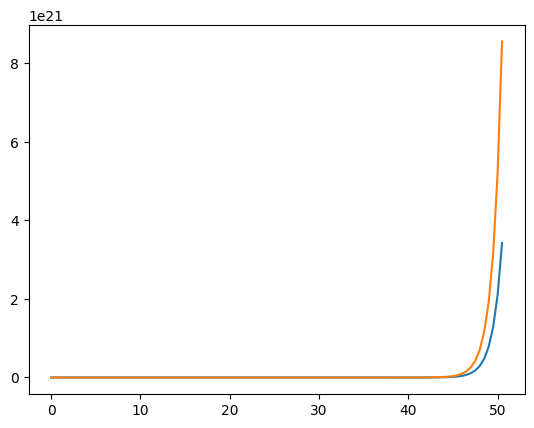

In [58]:
import matplotlib.pyplot as plt
import numpy as np

f = lambda t,y: y
y0 = 1.0
t0 = 0.0
t,y = adams_bashforth(f,y0,t0,.5,100)
print(y)

plt.plot(t,y)
plt.plot(t,np.exp(t))

3001


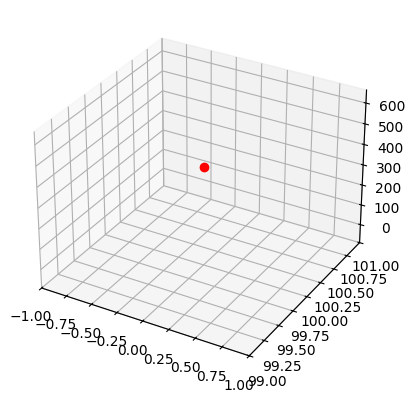

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation
import copy

class RigidBody:
    def __init__(self, mass, position, velocity, acceleration):
        self.mass = mass
        self.position = np.array(position)
        self.velocity = np.array(velocity)
        self.acceleration = np.array(acceleration)  
        self._history = []
    def kinetic_energy(self):
        return 0.5 * self.mass * (self.velocity ** 2)
    def update(self):
        # print(self.position)
        self._history.append(copy.deepcopy(self.position))
        self.position += self.velocity
        self.velocity += self.acceleration
        




class World: 
    def __init__(self, tick_rate=60.0):
        self.bodies = []
        self.tick_rate = tick_rate
        self._history = []
    def add_body(self, body):
        self.bodies.append(body)
    def update(self):
        for body in self.bodies:
            body.update()
            if body.position[2] < 0:
                body.velocity[2] = -.9*body.velocity[2]
    def run(self, time = 1.0):
        t = 0.0 
        while t < time:
            self.update()
            t += 1.0 / self.tick_rate
    def plot(self):
        # Convert positions to a numpy array for easier indexing
        # positions = np.array(self.positions)
        # positions = np.array([body.position for body in self.bodies])
        # print(self.bodies[0]._history)
        positions = np.array(self.bodies[0]._history)

        # Create a figure and a 3D axis
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')

        # Set the limits of the axes
        ax.set_xlim(np.min(positions[:, 0]) - 1, np.max(positions[:, 0]) + 1)
        ax.set_ylim(np.min(positions[:, 1]) - 1, np.max(positions[:, 1]) + 1)
        ax.set_zlim(np.min(positions[:, 2]) - 1, np.max(positions[:, 2]) + 1)

        # Initialize a point for the rigid body
        point, = ax.plot([positions[0,0]], [positions[0,1]], [positions[0,2]], 'ro')  # 'ro' means red color, circle marker

        # Initialize the scatter plot
        def init():
            point.set_data([positions[0,0]], [positions[0,1]],)
            point.set_3d_properties( [positions[0,2]])
            return point,

        # Update function for animation
        def update(frame):
            point.set_data([positions[frame, 0]], [positions[frame, 1]], )
            point.set_3d_properties(positions[frame, 2])
            return point,

        # Create an animation
        print(len(positions))
        ani = FuncAnimation(fig, update, frames=len(positions), init_func=init, interval=1/(.1*self.tick_rate))
        ani.save("movie.mp4")
        # # Show the plot
        # plt.show()



world = World(tick_rate=30)
rb1 = RigidBody(1.0, (0.0, 100.0, 100.0), (0.0, 0.0, 100.0), (0.0, 0.0, -9.8))
world.add_body(rb1)
world.run(100.0)
world.plot()
# world.bodies[0]._history

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (2,) + inhomogeneous part.

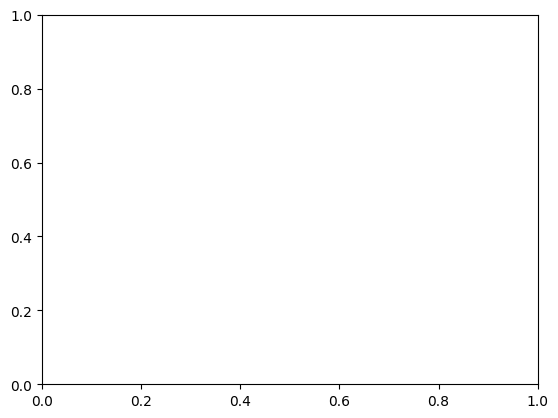

In [100]:
def f(x,y,t):
    return t,-(9.8*t**2) + 5*t

import matplotlib.pyplot as plt
import numpy as np

import matplotlib.animation as animation

def sim(f,x0,y0,t0,n,h):
    xi,yi,ti = x0,y0,t0
    x = [xi]
    y = [yi]
    t = [ti]
    for i in range(n):
        xi,yi = f(xi,yi,ti)
        ti += h
        # yield x,y
        x.append(xi)
        y.append(yi)
        t.append(ti)
    return x,y,t
x,y,t = sim(f,0.0,0.0,0.0,100,0.01)
vx,vy = np.gradient(x),np.gradient(y)
ax,ay = np.gradient(vx),np.gradient(vy)

predx = rk4(lambda t,y : t, x[0],t[0],0.01,100)
predy = rk4(lambda t,y : t, y[0],t[0],0.01,100)

fig, ax = plt.subplots()

# x = np.arange(0, 2*np.pi, 0.01)

pt, = ax.plot([x[0],predx[0]],[y[0],predy[0]],['ro','bo'])
# pt1, = ax.plot([predx[0]],[predy[0]],'bo')
ax.set_xlim(np.min(x),np.max(x))
ax.set_ylim(np.min(y),np.max(y))


def animate(i):
    # 
    pt.set_data([x[i],predx[i]],[y[i],predy[i]])
    # pt1.set_data([predx[i]],[predy[i]])
    return pt,


ani = animation.FuncAnimation(
    fig, animate, interval=20, blit=True, save_count=100)

ani.save("movie.mp4")